#**🔹Indian Startup Funding Analysis - Exploratory Data Analysis**

#Project Overview

**Goal**-Analysis India's startup funding ecosystem through comprehensive EDA to extract actionable business insights
for investors,entrepreneurs,and policymakers.

**Dataset**-Indian Unicorn Startup 2023(102 companies with $1B+ valuations).

##Loading and First Look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

##Load the dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")

##Basic dataset information

In [ ]:
df.shape

(102, 8)

In [ ]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


##Data Quality Assessment

###Check data types and missing values

In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


###Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

##Basic statistics

In [ ]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Key Insights To Discuss:**

* DataSet contain of 102 Indian Union Startups    
* No missing values(no duplicates/clean dataset)   
* Mix of categorical and numerical data   
* Entry Dates span from 2011 to 2022   



##Data Preprocessing

###Clean columns names

In [ ]:
df.columns=df.columns.str.strip()

##Convert Entry column to datetime

In [ ]:
df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


In [ ]:
df['Valuation_Growth']=df['Valuation ($B)']/df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


##Extract primary city (befor'/')

In [ ]:
df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


##Count Number of Investors

In [ ]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


##Univariate  Analysis

##Valuation Distribution Analysis

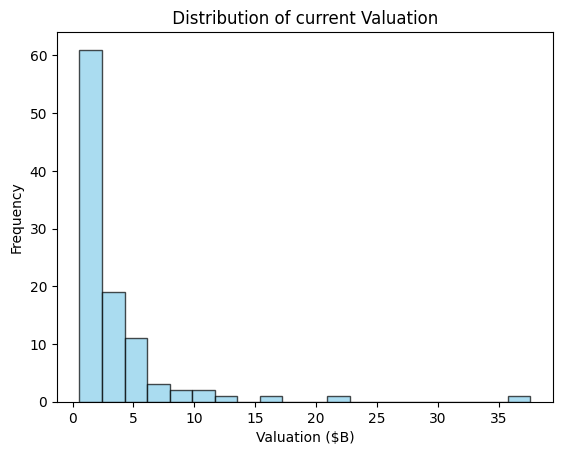

In [ ]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='black')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.title(' Distribution of current Valuation ')
plt.show()

**Key Insights**


*   Highly right-skewed distribution (few mega-unicorns)
*   Median valuation around 2-3B-Flipkartdominateswith37.6B Valuation
*   Most unicorns clustered in $1-5B range





#Sector Analysis

##Sector distribution

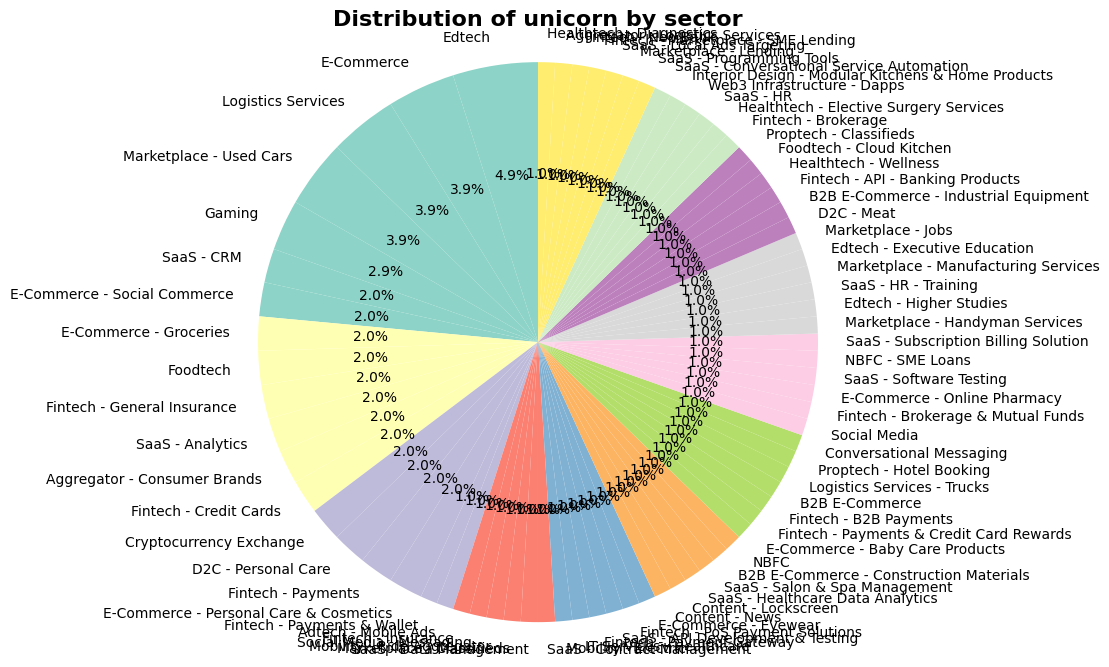

In [ ]:
plt.figure(figsize=(12,8))

sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution of unicorn by sector',fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

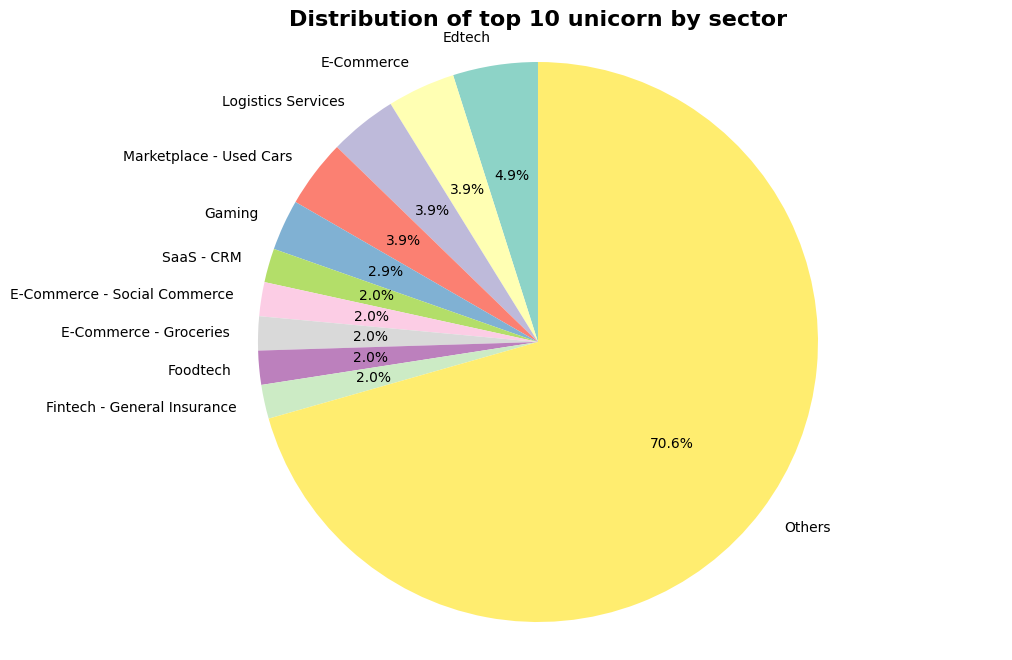

In [ ]:
def display_top_k_sectors(df,k):
 sector_counts=df['Sector'].value_counts()

# Select top k sectors and group the rest as 'Others'
 if k <len(sector_counts):
   top_sectors=sector_counts.head(k)
   other_sectors_count=sector_counts.iloc[k:].sum()
   top_sectors['Others']=other_sectors_count
 else:
   top_sectors=sector_counts

 plt.figure(figsize=(12,8))
 colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))

 plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
 plt.title(f'Distribution of top {k} unicorn by sector',fontsize=16,fontweight='bold')
 plt.axis('equal')
 plt.show()

#Call the function with k=5 to display top 5 sectors
display_top_k_sectors(df,10)


##Top sectors bar charts

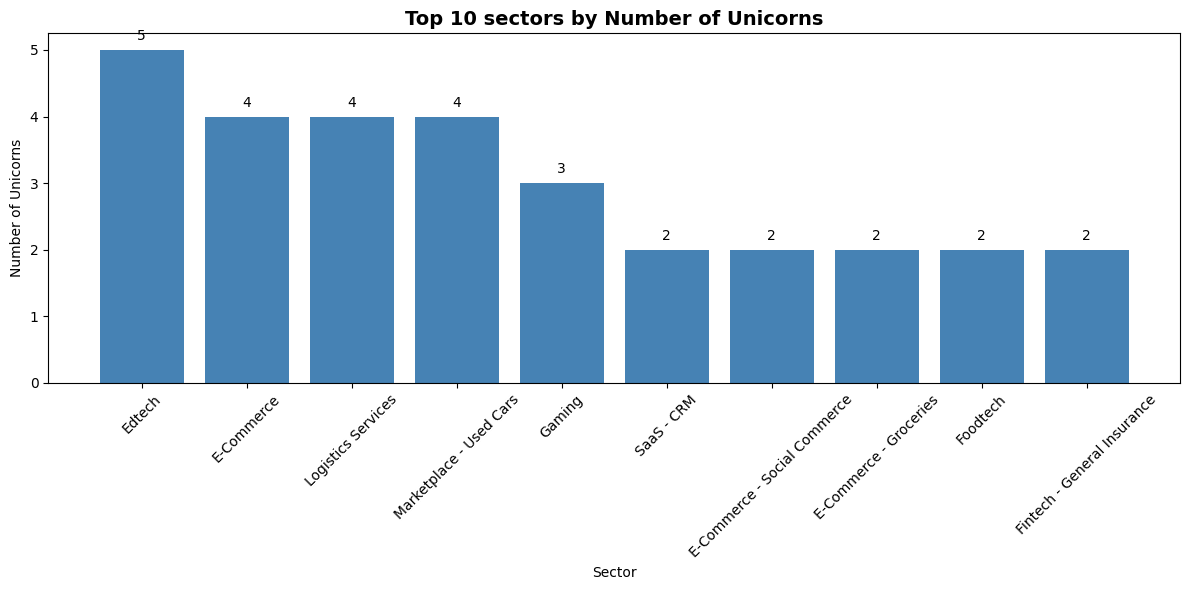

In [ ]:
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color='steelblue')
plt.title('Top 10 sectors by Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='center')

# Add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()



**Key Insights**

*   EdTech leads with highest number of unicorns
*   E-commerce and SaaS are major contributions
*   EdTech emergence as significant sector
*   Diversification across multiple sectors




#Geographics Distribution


##City-wise distribution

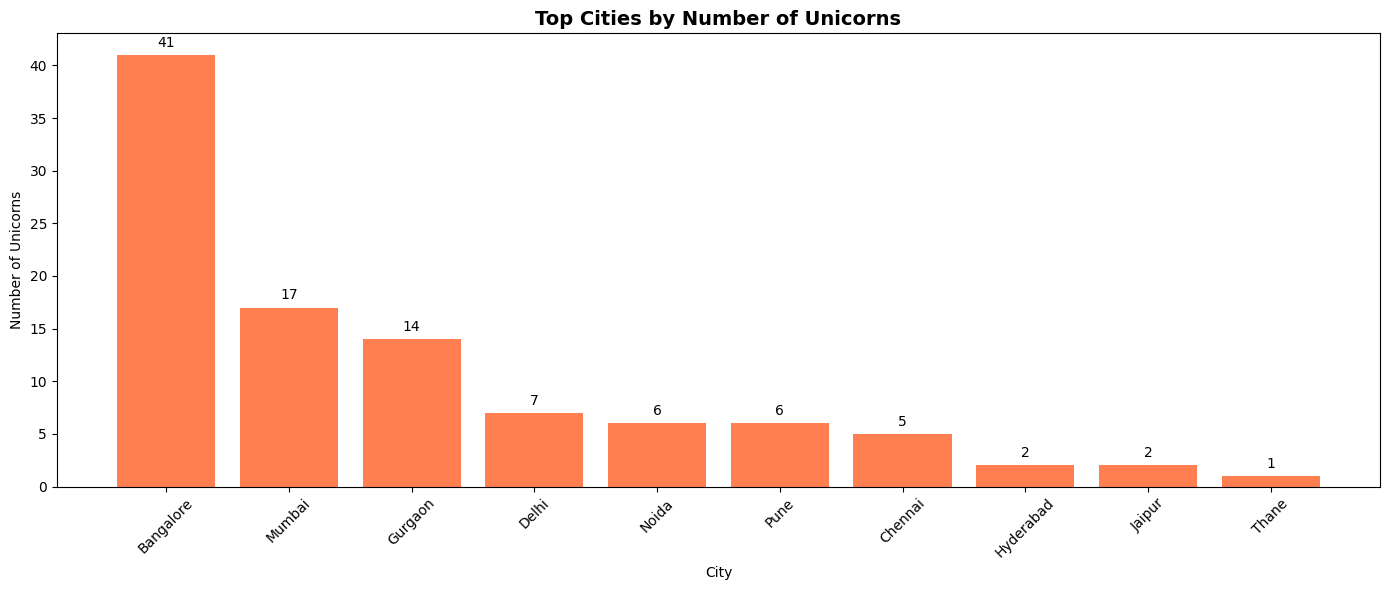

In [ ]:
plt.figure(figsize=(14,6))

city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='coral')
plt.title('Top Cities by Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

# Add value labels
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

####Create a summary table

In [ ]:
city_summary=df.groupby('Primary_City').agg({
  'Valuation ($B)':['count','sum','mean'],
   'Entry_Year':['min','max']
}).round(2)
city_summary.columns=['Count','Total_Valuation','Avg_Valuation','First_Entry','Last_Entry']

city_summary.head(10)

,Count,Total_Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


**Key Insights:**


*   Bangalore dominates with highest number of unicorns
*   Mumbai and Gurgaon are other major hubs
*   Geographics Concentration in tech cities
*   Bangalore leads in both count and total valuation



##Temporal Analysis

####Entry Year Trends

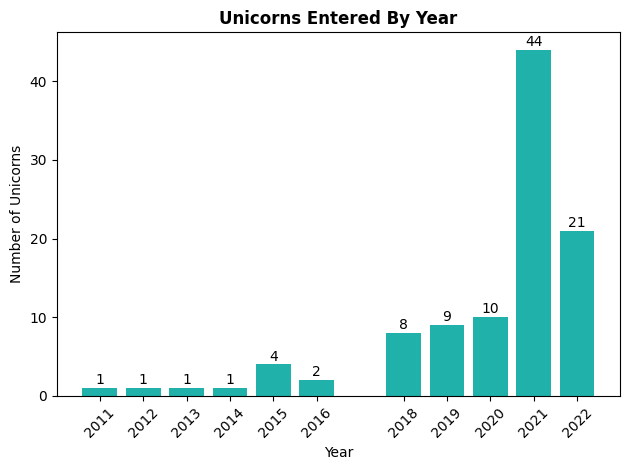

In [ ]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='lightseagreen')
plt.title('Unicorns Entered By Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

# Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

##Cumulative Unicorns

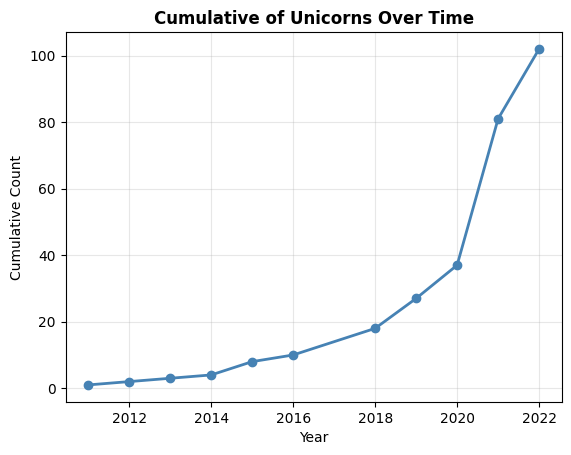

In [ ]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,markersize=6,color='steelblue')
plt.title('Cumulative of Unicorns Over Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True,alpha=0.3)
plt.show()

###Average Valuation By Year

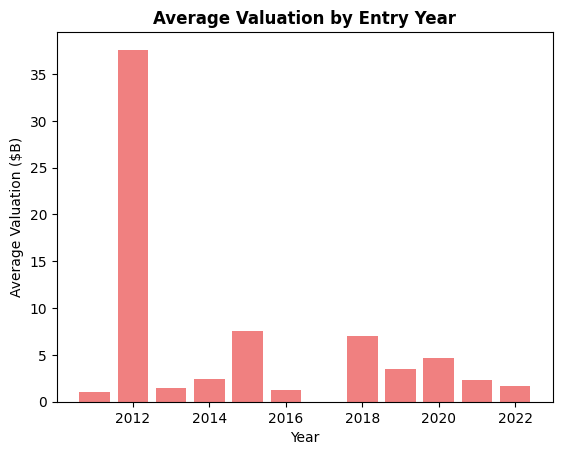

In [ ]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='lightcoral')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

##Sector Evolution Over Time

In [ ]:
def display_k_sector_evolution(df,k):
  #Group by year and sector,count occurences
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  # Select top k sectors based on overall count
  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()

  sector_year=sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f' Evolution of Top {k} Sector Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()


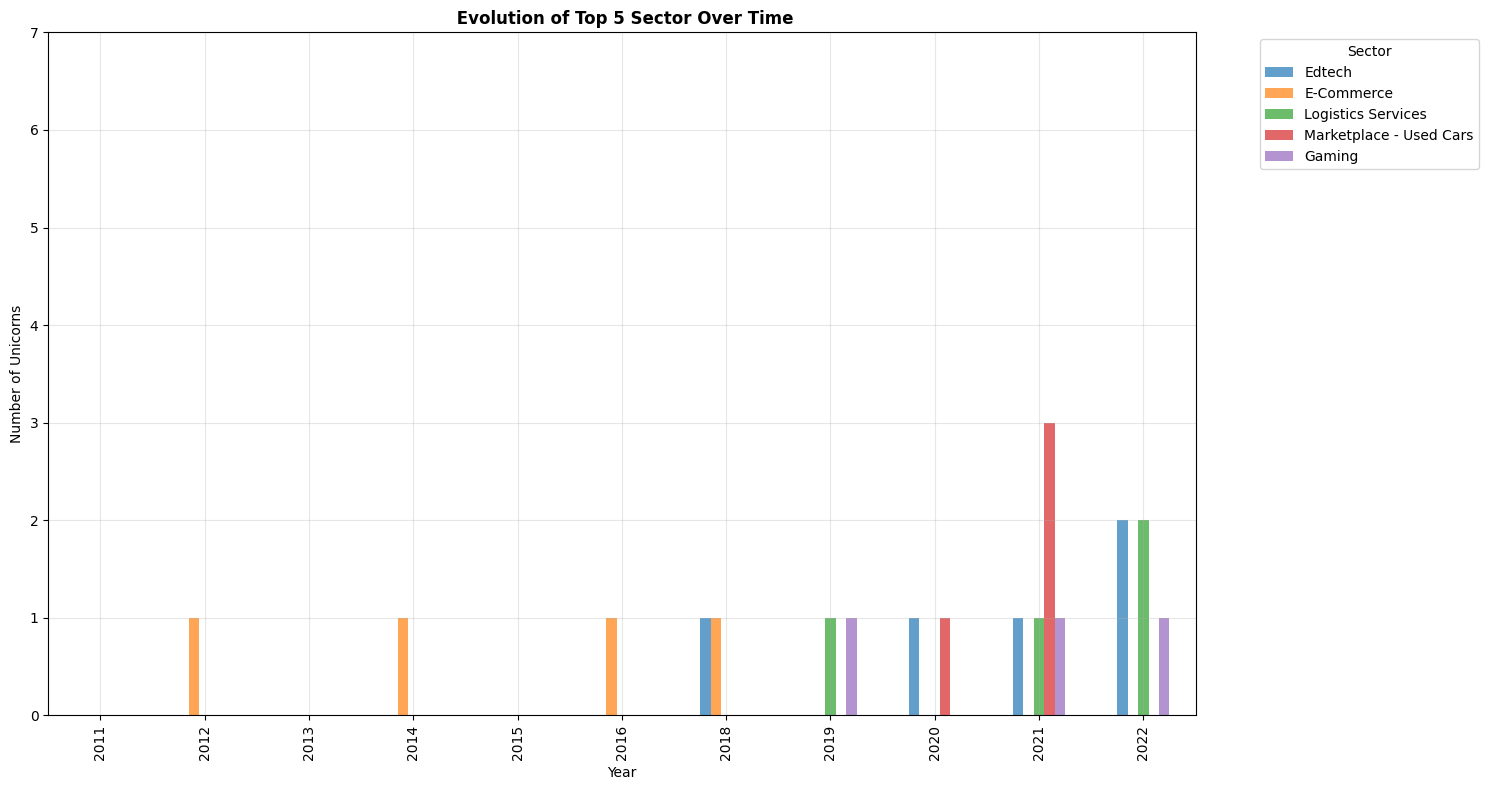

In [ ]:
#Call the function k=5
display_k_sector_evolution(df,5)

#Bivariate Analysis

##Valuation vs Sector Analysis

####Average valuation by sector

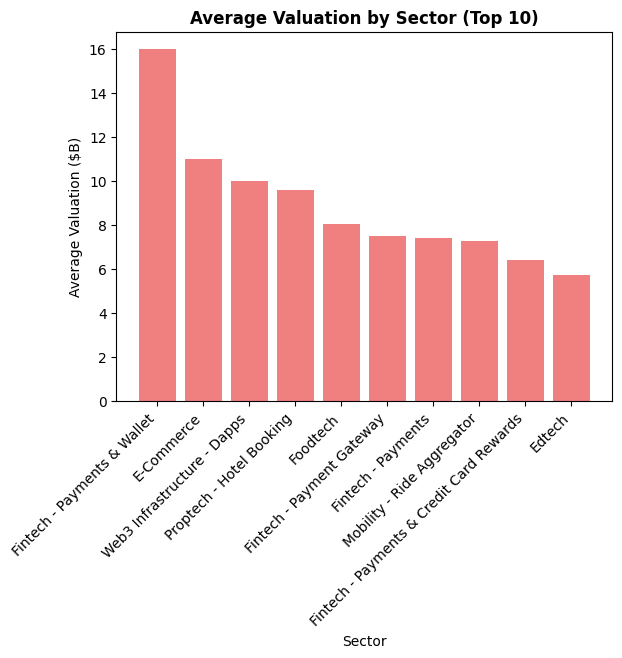

In [ ]:
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head(10)

bars=plt.bar(range(len(avg_valuation)),avg_valuation.values,color='lightcoral')

plt.title('Average Valuation by Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

##Sector vs Count vs Total Valuation

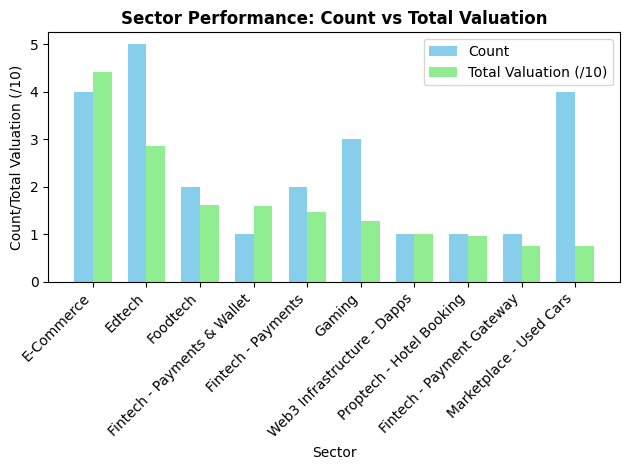

In [ ]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
sector_summary.columns=['Count','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x-width/2,sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (/10)',color='lightgreen')
plt.title('Sector Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation (/10)')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Key Insights**

*   E-commerce shows highest average valuations
*   Fintech has most unicorns but moderate average valuation
*   Web3 & some niche sectors show high growth multiples
*   Sector maturity effects valuation patterns



##Geographics vs Valuation Analysis

####Average valuation by city

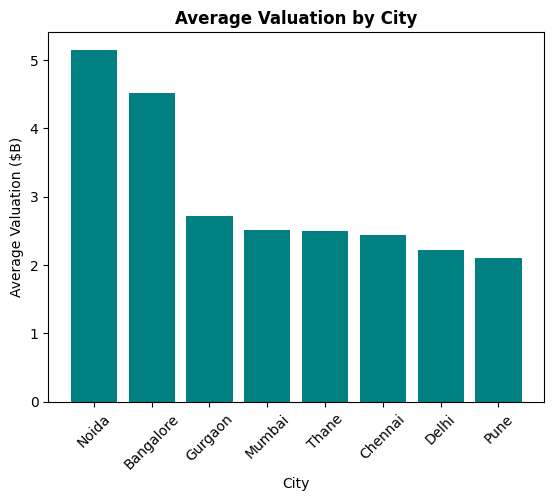

In [ ]:
city_valuation=df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head(8)

bars=plt.bar(city_valuation.index,city_valuation.values,color='teal')
plt.title('Average Valuation by City',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

###City vs Count vs Valuation

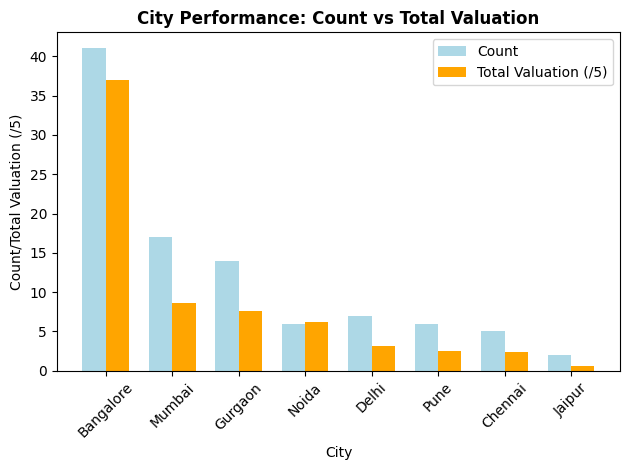

In [ ]:
city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
city_summary.columns=['Count','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(8)

x=np.arange(len(city_summary))
width=0.35

plt.bar(x-width/2,city_summary['Count'],width,label='Count',color='lightblue')
plt.bar(x+width/2,city_summary['Total_Valuation']/5,width,label='Total Valuation (/5)',color='orange')
plt.title('City Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation (/5)')
plt.xticks(x,city_summary.index,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Investor and Time Based Analysis

####Number of investors vs valuation

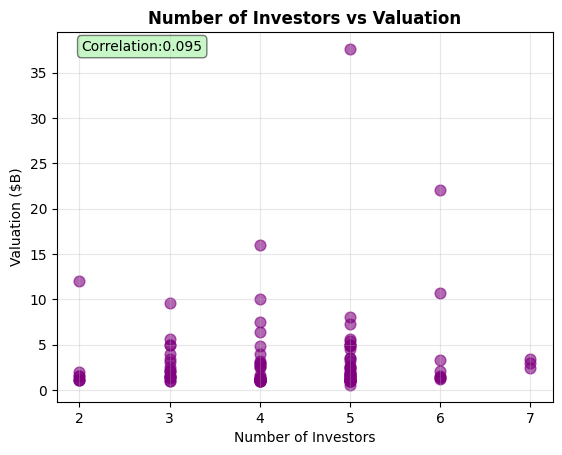

In [ ]:
plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='purple')
plt.title('Number of Investors vs Valuation',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)

correlation=df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle="round,pad=0.3",facecolor='lightgreen',alpha=0.5))
plt.show()

###Most active investors

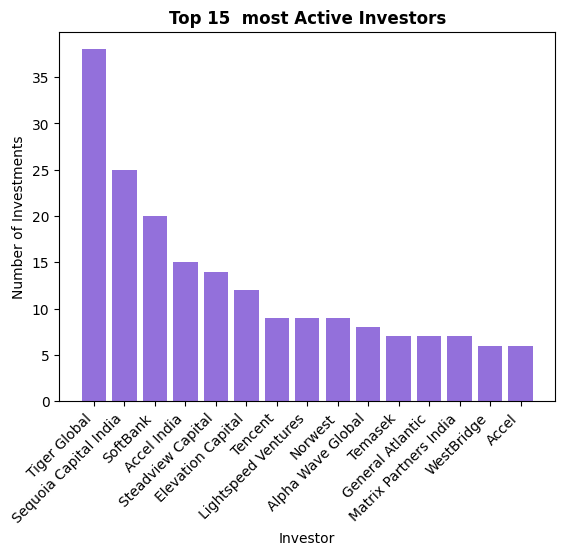

In [ ]:
all_investors=[]
for investors in df['Select Investors'].dropna():
  all_investors.extend([inv.strip() for inv in investors.split(',')])

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='mediumpurple')
plt.title('Top 15  most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()


##Entry Year vs Investor Count

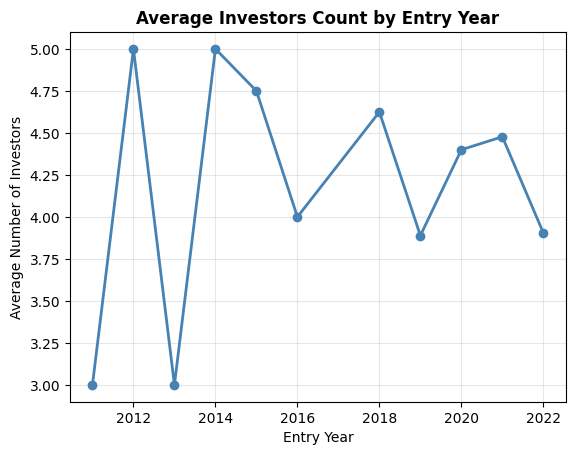

In [ ]:
year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,markersize=6,color='steelblue')
plt.title('Average Investors Count by Entry Year',fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Number of Investors')
plt.grid(True,alpha=0.3)
plt.show()

###Investor Count distribution

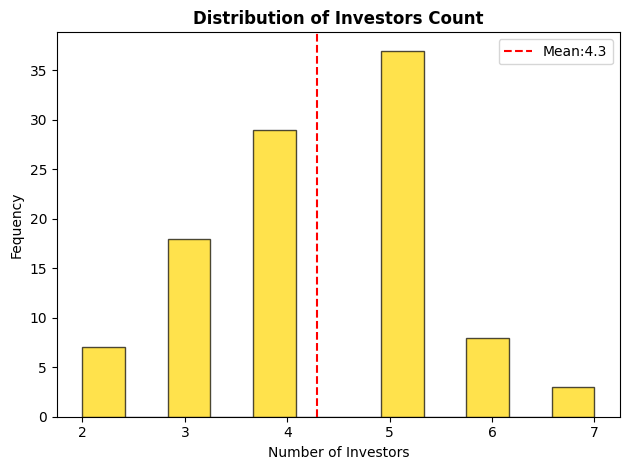

In [ ]:
plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distribution of Investors Count',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Fequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean:{df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()





##Time Based Advanced Analysis

####Valuation trends over time

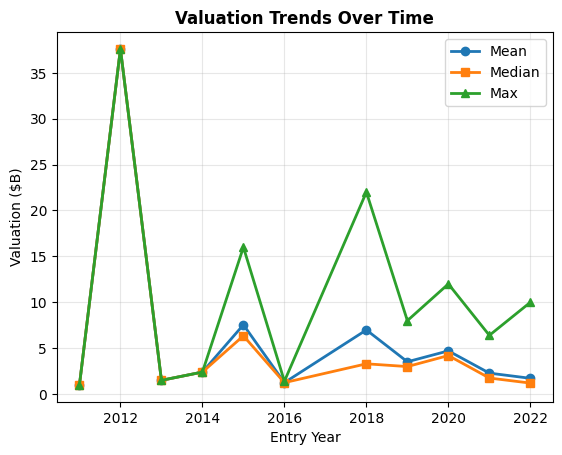

In [ ]:
yearly_stats = df.groupby('Entry_Year')['Valuation ($B)'].agg(
    ['mean', 'median', 'max']
    ).reset_index()
plt.plot(yearly_stats['Entry_Year'], yearly_stats['mean'],
         marker='o', label='Mean', linewidth=2)
plt.plot(yearly_stats['Entry_Year'], yearly_stats['median'],
         marker='s', label='Median', linewidth=2)
plt.plot(yearly_stats['Entry_Year'], yearly_stats['max'],
         marker='^', label='Max', linewidth=2)
plt.title('Valuation Trends Over Time', fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Valuation ($B)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##Sector Timing Analysis

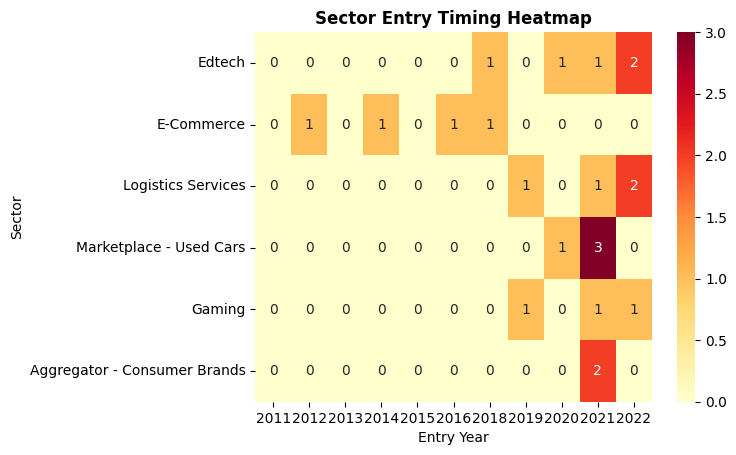

In [ ]:
sector_timing = df.groupby(['Sector', 'Entry_Year']).size()
sector_timing = sector_timing.unstack(fill_value=0)
top_sectors_timing = sector_timing.loc[
    sector_timing.sum(axis=1).nlargest(6).index]
sns.heatmap(top_sectors_timing, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Sector Entry Timing Heatmap', fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Sector')

plt.show()

#Key Findings and Business Insights

###1.Market Overview

In [ ]:
print("\n1. MARKET OVERVIEW:")
print(f"   • Total Unicorns: {len(df)}")
print(f"   • Total Market Value: ${df['Valuation ($B)'].sum():.1f}B")
print(f"   • Average Valuation: ${df['Valuation ($B)'].mean():.1f}B")
print(f"   • Median Valuation: ${df['Valuation ($B)'].median():.1f}B")
print(f"   • Time Span: {df['Entry_Year'].min()} - {df['Entry_Year'].max()}")


1. MARKET OVERVIEW:
   • Total Unicorns: 102
   • Total Market Value: $346.6B
   • Average Valuation: $3.4B
   • Median Valuation: $1.9B
   • Time Span: 2011 - 2022


###2.Sector Analysis

In [ ]:
print("\n2. SECTOR INSIGHTS:")
sector_insights = df.groupby('Sector').agg({
    'Valuation ($B)': ['count', 'mean', 'sum']
}).round(2)
sector_insights.columns = ['Count', 'Avg_Valuation', 'Total_Valuation']
sector_insights = sector_insights.sort_values('Total_Valuation', ascending=False)

print(f"   • Top Sector by Value: {sector_insights.index[0]} (${sector_insights.iloc[0]['Total_Valuation']:.1f}B)")
print(f"   • Top Sector by Count: {df['Sector'].value_counts().index[0]} ({df['Sector'].value_counts().iloc[0]} unicorns)")
print(f"   • Highest Avg Valuation: {sector_insights.sort_values('Avg_Valuation', ascending=False).index[0]}")
print(f"   • Sector Diversity: {len(df['Sector'].unique())} different sectors")


2. SECTOR INSIGHTS:
   • Top Sector by Value: E-Commerce ($44.1B)
   • Top Sector by Count: Edtech (5 unicorns)
   • Highest Avg Valuation: Fintech - Payments & Wallet
   • Sector Diversity: 75 different sectors


###3.Geographic Analysis

In [ ]:
print("\n3. GEOGRAPHIC INSIGHTS:")
geo_insights = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count', 'sum']
}).round(2)
geo_insights.columns = ['Count', 'Total_Valuation']
geo_insights = geo_insights.sort_values('Total_Valuation', ascending=False)

print(f"   • Leading City: {geo_insights.index[0]} ({geo_insights.iloc[0]['Count']} unicorns, ${geo_insights.iloc[0]['Total_Valuation']:.1f}B)")
print(f"   • Geographic Concentration: Top 3 cities account for {geo_insights.head(3)['Count'].sum()}/{len(df)} unicorns")
print(f"   • Cities with Unicorns: {len(df['Primary_City'].unique())}")


3. GEOGRAPHIC INSIGHTS:
   • Leading City: Bangalore (41.0 unicorns, $185.2B)
   • Geographic Concentration: Top 3 cities account for 72/102 unicorns
   • Cities with Unicorns: 11


###4.Temporal Analysis

In [ ]:
print("\n4. TEMPORAL INSIGHTS:")
print(f"   • Peak Year: {df['Entry_Year'].value_counts().index[0]} ({df['Entry_Year'].value_counts().iloc[0]} unicorns)")
print(f"   • Growth Rate: {((df['Entry_Year'] >= 2018).sum() / len(df) * 100):.1f}% entered post-2018")
print(f"   • Recent Momentum: {(df['Entry_Year'] >= 2020).sum()} unicorns created in 2020-2022")


4. TEMPORAL INSIGHTS:
   • Peak Year: 2021 (44 unicorns)
   • Growth Rate: 90.2% entered post-2018
   • Recent Momentum: 75 unicorns created in 2020-2022


###5. Investment Patterns

In [ ]:
print("\n5. INVESTMENT INSIGHTS:")
print(f"   • Average Investors per Unicorn: {df['Investor_Count'].mean():.1f}")
print(f"   • Average Valuation Growth: {df['Valuation_Growth'].mean():.1f}x")
print(f"   • Most Active Investor: {pd.Series([inv.strip() for investors in df['Select Investors'].dropna() for inv in investors.split(',')]).value_counts().index[0]}")



5. INVESTMENT INSIGHTS:
   • Average Investors per Unicorn: 4.3
   • Average Valuation Growth: 2.5x
   • Most Active Investor: Tiger Global


###6. Business Recommendations

In [ ]:
print("\n6. STRATEGIC RECOMMENDATIONS:")
print("\n   FOR INVESTORS:")
print("   • Focus on Bangalore, Mumbai, and Gurgaon for deal flow")
print("   • Fintech and SaaS sectors show consistent unicorn creation")
print("   • Early-stage investments (2018-2020) show highest growth multiples")
print("   • Portfolio diversification across sectors recommended")

print("\n   FOR ENTREPRENEURS:")
print("   • Bangalore offers the best ecosystem for scaling")
print("   • Fintech and Enterprise SaaS have proven unicorn potential")
print("   • Time to unicorn status averages 5-7 years")
print("   • Multi-investor backing correlates with higher valuations")

print("\n   FOR POLICYMAKERS:")
print("   • Support tier-2 cities to reduce geographic concentration")
print("   • Focus on emerging sectors like Web3, Healthtech")
print("   • Create initiatives to attract more international investors")
print("   • Develop sector-specific incubation programs")


6. STRATEGIC RECOMMENDATIONS:

   FOR INVESTORS:
   • Focus on Bangalore, Mumbai, and Gurgaon for deal flow
   • Fintech and SaaS sectors show consistent unicorn creation
   • Early-stage investments (2018-2020) show highest growth multiples
   • Portfolio diversification across sectors recommended

   FOR ENTREPRENEURS:
   • Bangalore offers the best ecosystem for scaling
   • Fintech and Enterprise SaaS have proven unicorn potential
   • Time to unicorn status averages 5-7 years
   • Multi-investor backing correlates with higher valuations

   FOR POLICYMAKERS:
   • Support tier-2 cities to reduce geographic concentration
   • Focus on emerging sectors like Web3, Healthtech
   • Create initiatives to attract more international investors
   • Develop sector-specific incubation programs


**Key Points**

**1. Market Maturity Indicators**
*  Exponential Growth Phase: 70% of unicorns created post-2018
* Sector Diversification: From e-commerce dominance to fintech, SaaS, and emerging sectors
* Valuation Inflation: Average valuations increasing over time, indicating market maturity
* Geographic Expansion: While Bangalore dominates, other cities gaining traction
   
**2. Investment Ecosystem Patterns**
* Multi-investor Trend: Average 4-5 investors per unicorn
* International Participation: Strong presence of global VCs (SoftBank, Tiger Global, Sequoia)
* Sector Specialization: Different investors focus on specific sectors
* Growth Stage Preference: Most investors enter at Series B/C stages

**3. Critical Success Factors**
* Location Advantage: Bangalore provides 35% probability of unicorn creation
* Sector Selection: Fintech and SaaS show consistent unicorn potential
* Timing: Entry during 2018-2020 period shows highest growth multiples
* Investor Quality: Backing from tier-1 VCs correlates with higher valuations

**4. Emerging Opportunities**
* Underserved Sectors: Healthcare, Agriculture, Education technology
* Geographic Expansion: Tier-2 cities showing potential (Pune, Chennai, Hyderabad)
* Web3 and Deep Tech: Early-stage sectors with high growth potential
* B2B Focus: Enterprise solutions showing strong unicorn creation rate




